# Wall_Maria (가제)

In [2]:
!conda info --envs

# conda environments:
#
base                     C:\Users\sacer\miniconda3
asd                   *  C:\Users\sacer\miniconda3\envs\asd



In [3]:
# standard Library ---- ---- ---- ----
import random
import os
import sys
print("sys.version :", sys.version)
import glob
from pprint import pprint
import time



# etc ---- ---- ---- ----
import warnings
warnings.filterwarnings(action='ignore') 
import tqdm
# if ("cv2" in sys.modules) == False:
#     !pip install opencv-python
# import cv2
# print("cv2.__version__ :", cv2.__version__)



# Data ---- ---- ---- ----
import numpy as np
print("np.__version__ :", np.__version__)
from statsmodels.tsa.stattools import adfuller
import pandas as pd
print("pd.__version__ :", pd.__version__)
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import seaborn as sns



# ML, DL ---- ---- ---- ----
# import tensorflow as tf
# print("tf.__version__ :", tf.__version__)
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# import torch
# print("torch.__version__ :", torch.__version__)
# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#     print('Not connected to a GPU')
# else:
#     print(gpu_info)


sys.path.append("../Import")
from definitions import crop_list2
from modul import reduce_mem_usage, EDA

root_path = "../"
data_path = f"{root_path}data/"

sys.version : 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:39:05) [MSC v.1929 64 bit (AMD64)]
np.__version__ : 1.22.4
pd.__version__ : 1.4.2


In [4]:
df_raw = pd.read_csv(f"{data_path}AgriMarket.csv")

EDA.Check(df_raw)

┌▣ df.shape ---- ---- ---- ----
(15880, 7)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YMD        15880 non-null  int64  
 1   Product    15880 non-null  object 
 2   Price      15880 non-null  float64
 3   환율(원/US$)  15880 non-null  float64
 4   콜금리(연%)    15880 non-null  float64
 5   item_PPI   11910 non-null  float64
 6   item_CPI   15880 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 868.6+ KB
None


┌▣ df.head() ---- ---- ---- ----


,YMD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI
0,20050103,감자,6323.101,1013.000,3.330,71.150,69.162
1,20050103,고구마,4291.111,1013.000,3.330,53.120,41.811
2,20050103,깻잎,4534.333,1013.000,3.330,NaN,53.348
3,20050103,마늘,20785.714,1013.000,3.330,49.580,58.270
4,20050104,감자,6233.314,1013.000,3.330,71.150,69.162


# df[]

In [5]:
crop = "마늘"

df = df_raw[df_raw["Product"] == crop]
EDA.Check(df)

┌▣ df.shape ---- ---- ---- ----
(3970, 7)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 3 to 15879
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YMD        3970 non-null   int64  
 1   Product    3970 non-null   object 
 2   Price      3970 non-null   float64
 3   환율(원/US$)  3970 non-null   float64
 4   콜금리(연%)    3970 non-null   float64
 5   item_PPI   3970 non-null   float64
 6   item_CPI   3970 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 248.1+ KB
None


┌▣ df.head() ---- ---- ---- ----


,YMD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI
3,20050103,마늘,20785.714,1013.000,3.330,49.580,58.270
7,20050104,마늘,20785.714,1013.000,3.330,49.580,58.270
11,20050105,마늘,20928.571,1013.000,3.330,49.580,58.270
15,20050106,마늘,21071.429,1013.000,3.330,49.580,58.270
19,20050107,마늘,21071.429,1013.000,3.330,49.580,58.270


In [6]:
df.shape[0] / (365*(5/7))

15.227397260273973

In [11]:
def adf_test(y):
    ## perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    display(dfoutput.to_frame())

df_ft = df[df.columns.difference(['Product'])]
adf_test(df["Price"])

Results of Augmented Dickey-Fuller test:


,0
test statistic,-2.518
p-value,0.111
# of lags,11.000
# of observations,3958.000
Critical Value (1%),-3.432
Critical Value (5%),-2.862
Critical Value (10%),-2.567


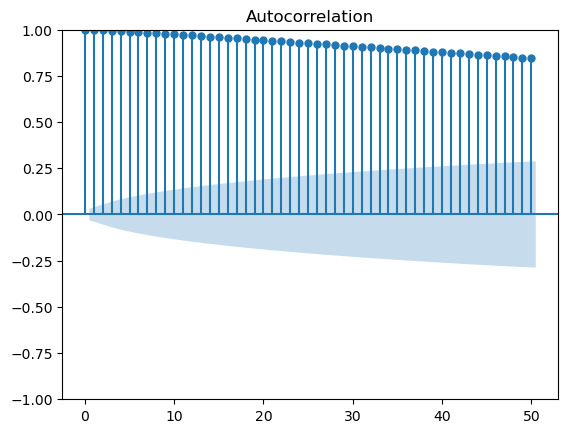

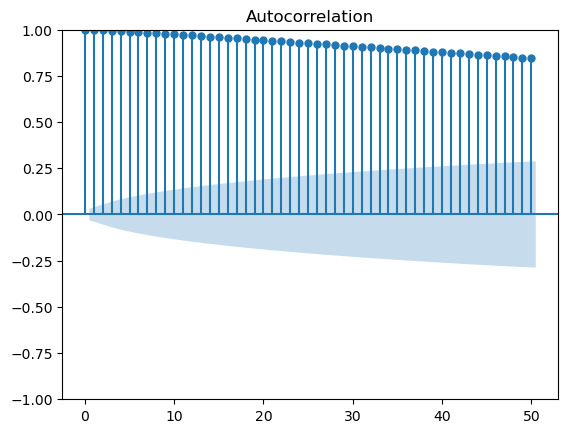

In [30]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df["Price"], lags=50)